# fashion_mnist 예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # 데이터 전처리를 위해 사용하는 라이브러리
from torch.utils.data import Dataset, DataLoader

In [2]:
# CPU 혹은 GPU 장치 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cpu')

In [4]:
# 하나의 GPU사용
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net()
model.to(device)

NameError: name 'Net' is not defined

In [5]:
# 다수의 GPU사용 // nn.DataParallel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net()
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(net)
model.to(device)

NameError: name 'Net' is not defined

In [6]:
# fashion_mnist 데이터셋 내려받기
train_dataset = torchvision.datasets.FashionMNIST("./data",
                                                  download=True,
                                                  transform=transforms.Compose([transforms.ToTensor()]))

test_dataset = torchvision.datasets.FashionMNIST("./data",
                                                 download=True,
                                                 train=False,
                                                 transform=transforms.Compose([transforms.ToTensor()]))

C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [8]:
dir(train_dataset)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [9]:
train_dataset[0][0][0,:,:]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [10]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [11]:
train_dataset[0][0][:,:,:]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [12]:
# fashion_mnist 데이터를 데이터로더에 전달
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

In [13]:
train_loader

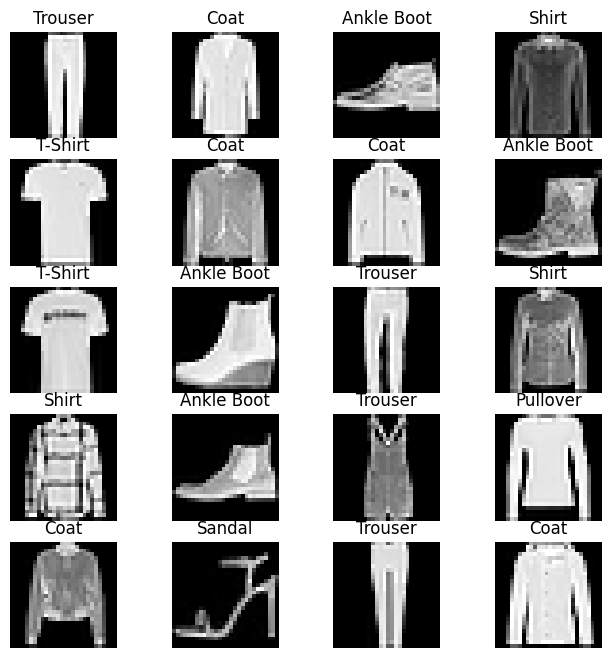

In [14]:
# 분류에 사용될 클래스 정의
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'} # 10개의 클래스

fig = plt.figure(figsize=(8,8)) # 출력할 이미지의 가로세로 길이 - 단위: inch
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0,:,:] # 해당하는 이미지를 보여줌
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]]) # 라벨을 보여줌
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [15]:
# np.random 예시
import numpy as np
np.random.randint(10) # 0 ~ 9 사이의 임의의 정수 출력

8

In [16]:
np.random.randint(1, 10) # 1 ~ 9 사이의 임의의 정수 출력

6

In [17]:
np.random.rand(8) # 0 ~ 1 사이의 정규표준분포 난수를 행렬로 (1x8) 출력

array([0.50371763, 0.18643125, 0.57432473, 0.90602235, 0.3213547 ,
       0.5246429 , 0.97576803, 0.71210391])

In [18]:
np.random.rand(8).shape

(8,)

In [19]:
np.random.rand(4, 2) # 0 ~ 1 사이의 표준정규분포 난수를 (4x2) 출력

array([[0.47859245, 0.88787465],
       [0.40020486, 0.13060271],
       [0.24707312, 0.91817419],
       [0.43924349, 0.87305764]])

In [20]:
np.random.randn(8) # 평균이 0이고, 표준편차가 1인 가우시안 정규분포 난수를 (1x8) 출력

array([ 0.67852217, -1.232345  ,  2.16775114,  1.19138363, -0.79625836,
       -1.69404402,  1.18730027, -0.41322761])

In [21]:
np.random.randn(4, 2) # 평균이 0이고, 표준편차가 1인 가우시안 정규분포 난수를 (4x2) 출력

array([[ 0.53662788, -2.21579433],
       [-0.05237225, -0.28419498],
       [ 0.55367759, -1.67246099],
       [-0.26746071, -0.57978891]])

In [22]:
import numpy as np

examp = np.arange(0, 100, 3) # 1 ~ 99 정수에서 3씩 건너뛴 행렬을 생성
examp

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])

In [23]:
examp.shape

(34,)

In [24]:
examp = np.resize(examp, (6, 4)) # 행렬의 크기를 6x4로 조정
examp

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45],
       [48, 51, 54, 57],
       [60, 63, 66, 69]])

In [25]:
examp[3] # 4번째 행에 해당하는 모든 요소 (index = 0, 1, 2, 3)

array([36, 39, 42, 45])

In [26]:
examp[3, 3] # 3행의 3열에 대한 요소

45

In [27]:
examp[3][3] # 3행의 3열에 대한 요소

45

In [28]:
examp = np.arange(0, 500, 3)
examp

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231,
       234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270,
       273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309,
       312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348,
       351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387,
       390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426,
       429, 432, 435, 438, 441, 444, 447, 450, 453, 456, 459, 462, 465,
       468, 471, 474, 477, 480, 483, 486, 489, 492, 495, 498])

In [29]:
examp = np.resize(examp, (3, 5, 5))
examp

array([[[  0,   3,   6,   9,  12],
        [ 15,  18,  21,  24,  27],
        [ 30,  33,  36,  39,  42],
        [ 45,  48,  51,  54,  57],
        [ 60,  63,  66,  69,  72]],

       [[ 75,  78,  81,  84,  87],
        [ 90,  93,  96,  99, 102],
        [105, 108, 111, 114, 117],
        [120, 123, 126, 129, 132],
        [135, 138, 141, 144, 147]],

       [[150, 153, 156, 159, 162],
        [165, 168, 171, 174, 177],
        [180, 183, 186, 189, 192],
        [195, 198, 201, 204, 207],
        [210, 213, 216, 219, 222]]])

In [30]:
examp[2][0][3]

159

In [31]:
examp[0][:,:]

array([[ 0,  3,  6,  9, 12],
       [15, 18, 21, 24, 27],
       [30, 33, 36, 39, 42],
       [45, 48, 51, 54, 57],
       [60, 63, 66, 69, 72]])

In [32]:
# 심층 신경망 모델 생성
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=256)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
        
    def forward(self, input_data):
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [33]:
m = nn.Linear(20, 30)
m

Linear(in_features=20, out_features=30, bias=True)

In [34]:
input  = torch.randn(128, 20)
input

tensor([[ 1.7633,  2.4795, -1.5462,  ...,  0.6958, -1.0719,  0.2452],
        [ 1.9581, -0.5274,  1.2755,  ...,  0.5494,  0.0501,  0.4106],
        [-0.2384,  0.6918, -0.7371,  ..., -1.2634,  0.7060,  0.0907],
        ...,
        [-1.1412,  2.3221, -0.4418,  ...,  1.1603, -0.0722,  0.2229],
        [ 0.8716,  1.1474, -0.6939,  ..., -0.3352, -1.2824,  0.6958],
        [-0.4740, -0.2593, -0.3305,  ...,  1.4257,  0.3821,  0.7816]])

In [35]:
input.size()

torch.Size([128, 20])

In [36]:
output = m(input)
output

tensor([[ 1.4062, -0.5134, -0.4770,  ..., -0.9040, -0.7361,  0.1730],
        [ 0.2534, -0.9168, -0.5538,  ...,  0.9801, -0.2841, -0.2535],
        [ 0.3549, -0.2170,  0.2949,  ..., -0.2090,  0.3234,  0.7164],
        ...,
        [-0.2441,  0.5559,  0.4508,  ...,  0.1409,  0.4220,  1.1031],
        [ 0.5343, -0.5067, -0.3829,  ..., -1.3172, -1.3866,  0.6036],
        [-0.6819,  0.3923, -0.1692,  ...,  0.0887, -0.2816,  0.1212]],
       grad_fn=<AddmmBackward>)

In [37]:
output.size()

torch.Size([128, 30])

In [38]:
# 활성화 함수를 지정하는 2가지 방법
# 1. nn을 사용
import torch
import torch.nn as nn

inputs = torch.randn(64, 3, 244, 244)
# 3개의 채널이 입력되어 64개의 채널이 출력되기 위한 연산으로 3x3 크기의 커널을 사용
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
outputs = conv(inputs)
layer = nn.Conv2d(1, 1, 3)

In [39]:
inputs

tensor([[[[ 0.6262,  1.0679,  0.7142,  ..., -0.3367,  0.4356,  1.3720],
          [ 0.8765,  0.7083,  0.5018,  ..., -1.2078,  0.3388, -1.7988],
          [ 1.4829, -0.6732, -1.1852,  ..., -0.1520, -0.7112, -0.3248],
          ...,
          [-0.1605,  0.1821, -0.1207,  ...,  0.0678,  0.0060,  0.0757],
          [ 0.7050,  0.4534,  1.1867,  ..., -1.2066, -0.9932, -0.1058],
          [-0.0950, -0.2971,  1.8315,  ..., -2.3062,  1.0809,  0.6151]],

         [[ 0.4903, -1.1926, -0.9354,  ...,  1.1074, -0.2393,  1.3009],
          [-0.6206,  0.0256,  2.0594,  ...,  1.6487, -1.6550, -1.2463],
          [ 1.2867,  0.9752, -0.7673,  ..., -0.6731, -0.8743,  0.2755],
          ...,
          [-0.5077, -0.8105,  0.5625,  ..., -1.0039, -2.9950, -0.9772],
          [-2.0932, -1.3832,  0.3653,  ...,  2.2563, -0.3177,  1.5325],
          [-0.4700,  2.3241,  0.4384,  ..., -0.6228, -1.7284, -0.8394]],

         [[-0.5542,  1.8172, -0.5544,  ..., -1.1730, -1.2936, -0.9321],
          [-0.5993,  0.3596,  

In [40]:
len(inputs)

64

In [41]:
inputs.shape

torch.Size([64, 3, 244, 244])

In [42]:
inputs.size()

torch.Size([64, 3, 244, 244])

In [43]:
conv

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [44]:
outputs

tensor([[[[-8.8035e-02, -4.6376e-01,  1.8142e-01,  ...,  1.1386e+00,
            7.0287e-01,  4.0030e-01],
          [-4.6241e-01,  2.5183e-01,  2.6501e-01,  ...,  7.9103e-01,
           -4.0667e-01,  3.0972e-01],
          [-6.5619e-02,  5.7452e-02,  5.8699e-02,  ..., -5.1451e-01,
           -6.8154e-01, -3.4086e-03],
          ...,
          [-1.9118e-01, -4.5459e-01, -5.7849e-01,  ..., -8.6482e-01,
           -2.1146e-01, -5.4723e-01],
          [-1.2936e+00, -2.1687e-01, -6.5415e-01,  ...,  6.2874e-01,
            5.7340e-01,  3.4954e-01],
          [ 1.1904e-02,  1.2190e+00,  5.0787e-01,  ...,  1.3657e-01,
           -3.3076e-01, -1.9025e-01]],

         [[-2.1427e-02, -3.6717e-01, -5.4364e-02,  ..., -4.5524e-01,
           -3.8825e-01, -8.5478e-01],
          [ 5.1312e-02, -6.2106e-02, -8.3434e-01,  ...,  8.8525e-01,
            4.9366e-01,  6.6568e-01],
          [-5.7592e-01,  3.3452e-01,  3.1057e-02,  ...,  3.0133e-01,
           -1.3819e-01, -4.8526e-01],
          ...,
     

In [45]:
outputs.size()

torch.Size([64, 64, 244, 244])

In [46]:
layer

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [47]:
# 2. nn.functional
import torch.nn.functional as F

inputs = torch.randn(64, 3, 244, 244)
weight = torch.randn(64, 3, 3, 3)
bias = torch.randn(64)
outputs = F.conv2d(inputs, weight, bias, padding=1)

In [48]:
outputs

tensor([[[[-7.3337e-02, -1.0546e+01,  3.3658e+00,  ..., -1.0324e+00,
           -9.9176e-01, -2.4361e+00],
          [ 5.7423e+00,  1.1512e+00, -9.6075e+00,  ...,  4.5586e+00,
           -2.7567e+00, -1.5438e+00],
          [-2.0472e+00,  1.1353e+00, -2.3590e+00,  ..., -4.2913e+00,
           -3.4550e+00,  4.9024e+00],
          ...,
          [ 2.2769e+00, -3.4686e+00,  1.7425e+00,  ...,  4.5515e+00,
           -1.6241e+00, -5.5423e+00],
          [-2.1324e+00,  6.2087e+00,  5.8001e-01,  ..., -3.0972e+00,
            8.4268e+00,  3.2511e+00],
          [-8.1273e-02,  5.1807e-01,  2.1610e+00,  ..., -7.0296e+00,
            2.0867e+00, -9.8019e-01]],

         [[ 7.6049e-01,  8.9457e+00,  4.9619e+00,  ...,  4.8059e-01,
            1.1810e+00, -5.9012e-01],
          [-1.2608e+01, -3.0638e+00,  1.0077e+01,  ..., -5.1026e+00,
           -7.9860e+00,  2.3490e-01],
          [-8.0808e+00, -5.9530e+00,  1.4797e+01,  ...,  5.8276e+00,
            6.7215e+00, -1.0223e+01],
          ...,
     

In [49]:
outputs.size()

torch.Size([64, 64, 244, 244])

In [50]:
# 심층 신경망에서 필요한 파라미터 정의
lr = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [51]:
# 심층 신경망을 이용한 모델 학습
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        outputs = model(train) # 학습 데이터를 모델에 적용
        loss = criterion(outputs, labels)
        optimizer.zero_grad() # 기울기 0으로 초기화 // Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문
        loss.backward() # 역전파
        optimizer.step()
        count += 1
        
        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)
                
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.5501081347465515, Accuracy: 83.41999816894531%
Iteration: 1000, Loss: 0.4783174395561218, Accuracy: 84.0199966430664%
Iteration: 1500, Loss: 0.37280285358428955, Accuracy: 84.41000366210938%
Iteration: 2000, Loss: 0.39687755703926086, Accuracy: 85.86000061035156%
Iteration: 2500, Loss: 0.2538723647594452, Accuracy: 85.8499984741211%
Iteration: 3000, Loss: 0.30564892292022705, Accuracy: 87.12000274658203%


In [53]:
# 합성곱 네트워크 생성
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
                                    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
                                    nn.BatchNorm2d(32),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2)
                                    )
        self.layer2 = nn.Sequential(
                                    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
                                    nn.BatchNorm2d(64),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2)
                                    )
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10) # 마지막 계층의 out_features는 클래스 개수
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out       

In [54]:
# 합성곱 네트웤를 위한 파라미터 정의
lr = 0.001
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [55]:
# 모델 학습 및 평가 // 앞의 코드와 동일
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        outputs = model(train) # 학습 데이터를 모델에 적용
        loss = criterion(outputs, labels)
        optimizer.zero_grad() # 기울기 0으로 초기화 // Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문
        loss.backward() # 역전파
        optimizer.step()
        count += 1
        
        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)
                
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Iteration: 500, Loss: 0.43211570382118225, Accuracy: 87.76000213623047%
Iteration: 1000, Loss: 0.3731275498867035, Accuracy: 88.41999816894531%
Iteration: 1500, Loss: 0.312968373298645, Accuracy: 87.41999816894531%
Iteration: 2000, Loss: 0.21942785382270813, Accuracy: 88.81999969482422%
Iteration: 2500, Loss: 0.13845095038414001, Accuracy: 89.37000274658203%
Iteration: 3000, Loss: 0.16753630340099335, Accuracy: 89.05000305175781%
